## Random Forest

### TASKS:

#### 1. Exploratory Data Analysis (EDA):

    * Perform exploratory data analysis to understand the structure of the dataset.
    * Check for missing values, outliers, inconsistencies in the data.

#### 2: Data Visualization:

    * Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
    * Analyze any patterns or correlations observed in the data.

#### 3: Data Preprocessing

    1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
    2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
    3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

#### 4: Random Forest Model Implementation

    1. Divide the data into train and test split.
    2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
    3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

#### 5: Bagging and Boosting Methods

    Apply the Bagging and Boosting methods and compare the results.


***Additional Notes:***

    1. Explain Bagging and Boosting methods. How is it different from each other.    
    2. Explain how to handle imbalance in the data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Load dataset
glass_df = pd.read_excel("glass.xlsx", sheet_name = "glass")
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### *1. Exploratory Data Analysis (EDA):*

In [3]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# Statistical Summary
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# Check for missing values
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# check for duplicates
if(glass_df.duplicated().sum() != 0):
    print("DUPLICATES ARE PRESENT")
    print("No. of duplicated rows: ", glass_df.duplicated().sum())
else:
    print("NO DUPLICATES PRESENT")

# Print duplicated values
glass_df[glass_df.duplicated(keep = False)]

DUPLICATES ARE PRESENT
No. of duplicated rows:  1


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
# Drop duplicates
glass_df.drop_duplicates(inplace = True)
print("No. of duplicated rows: ", glass_df.duplicated().sum())

No. of duplicated rows:  0


In [8]:
# Numerical Columns
glass_num = glass_df.iloc[:,0:8]
glass_num.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba'], dtype='object')

In [9]:
# Categorical Column
glass_cat = glass_df.iloc[:,-1]
glass_cat

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

#### *2: Data Visualization:*

In [10]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

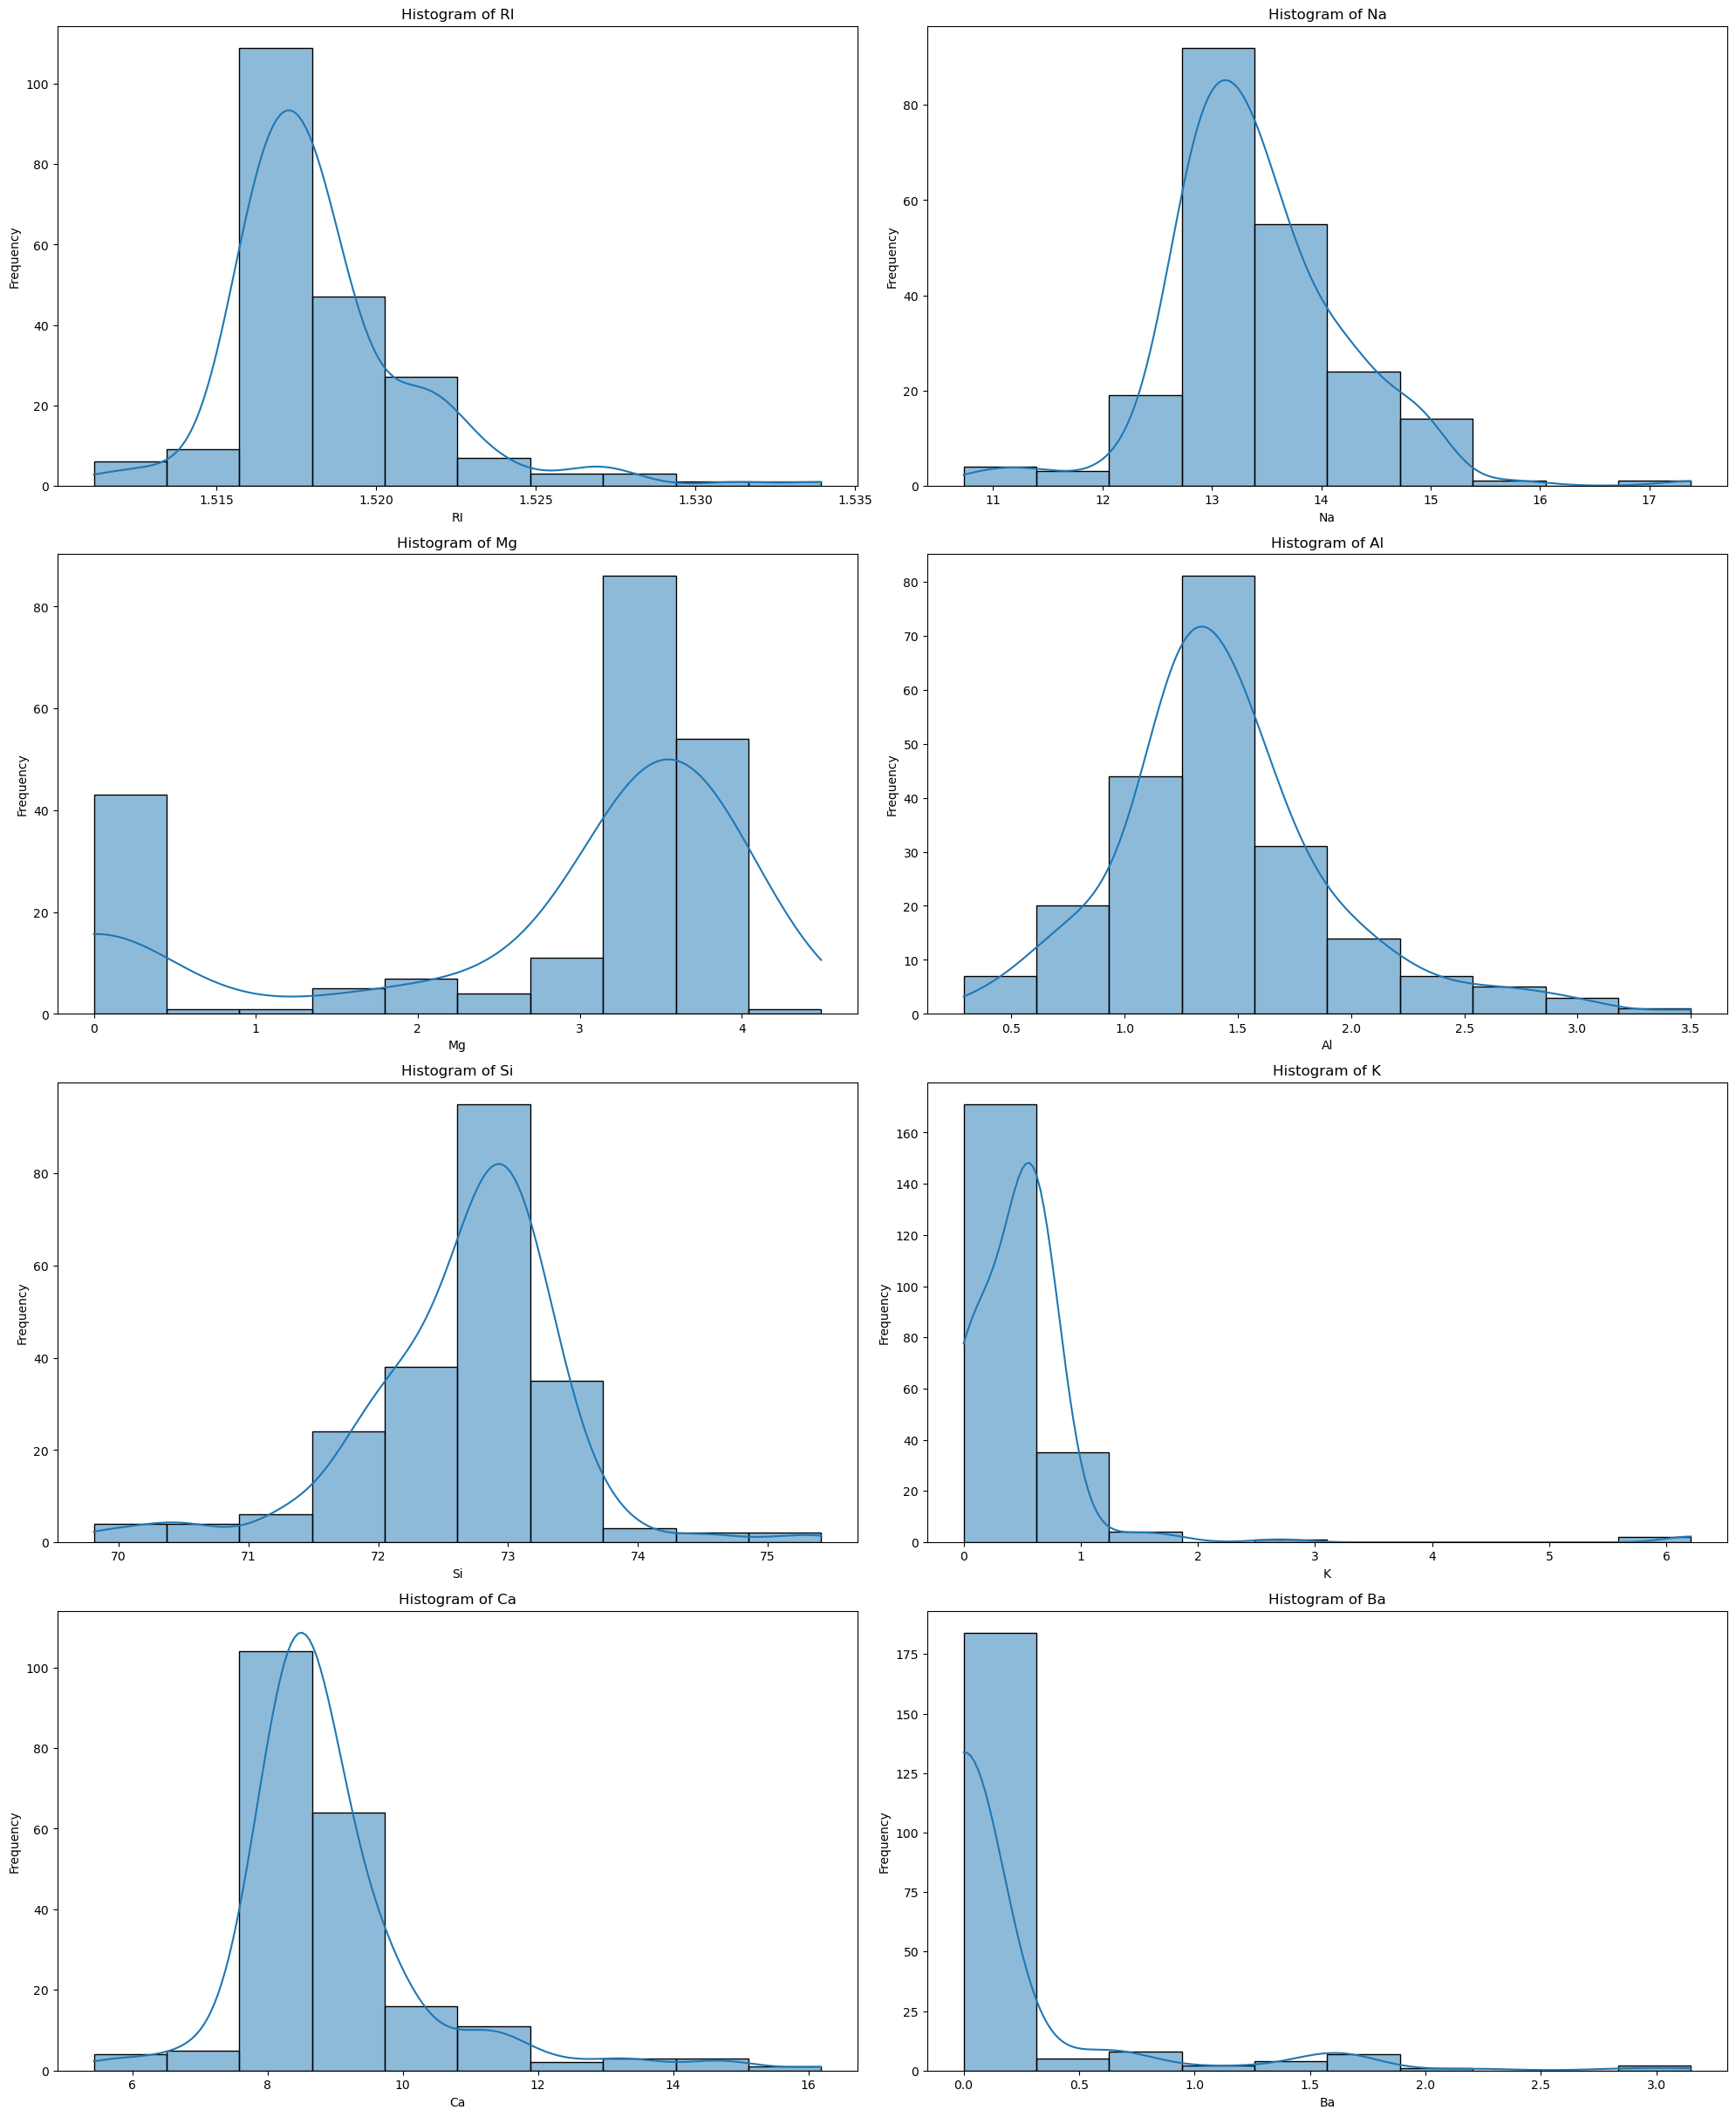

In [11]:
# HISTOGRAM
plt.figure(figsize = (20,30))
for i, column in enumerate( glass_num,1):
    plt.subplot(5,2,i)
    sns.histplot(glass_df[column], bins = 10, kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

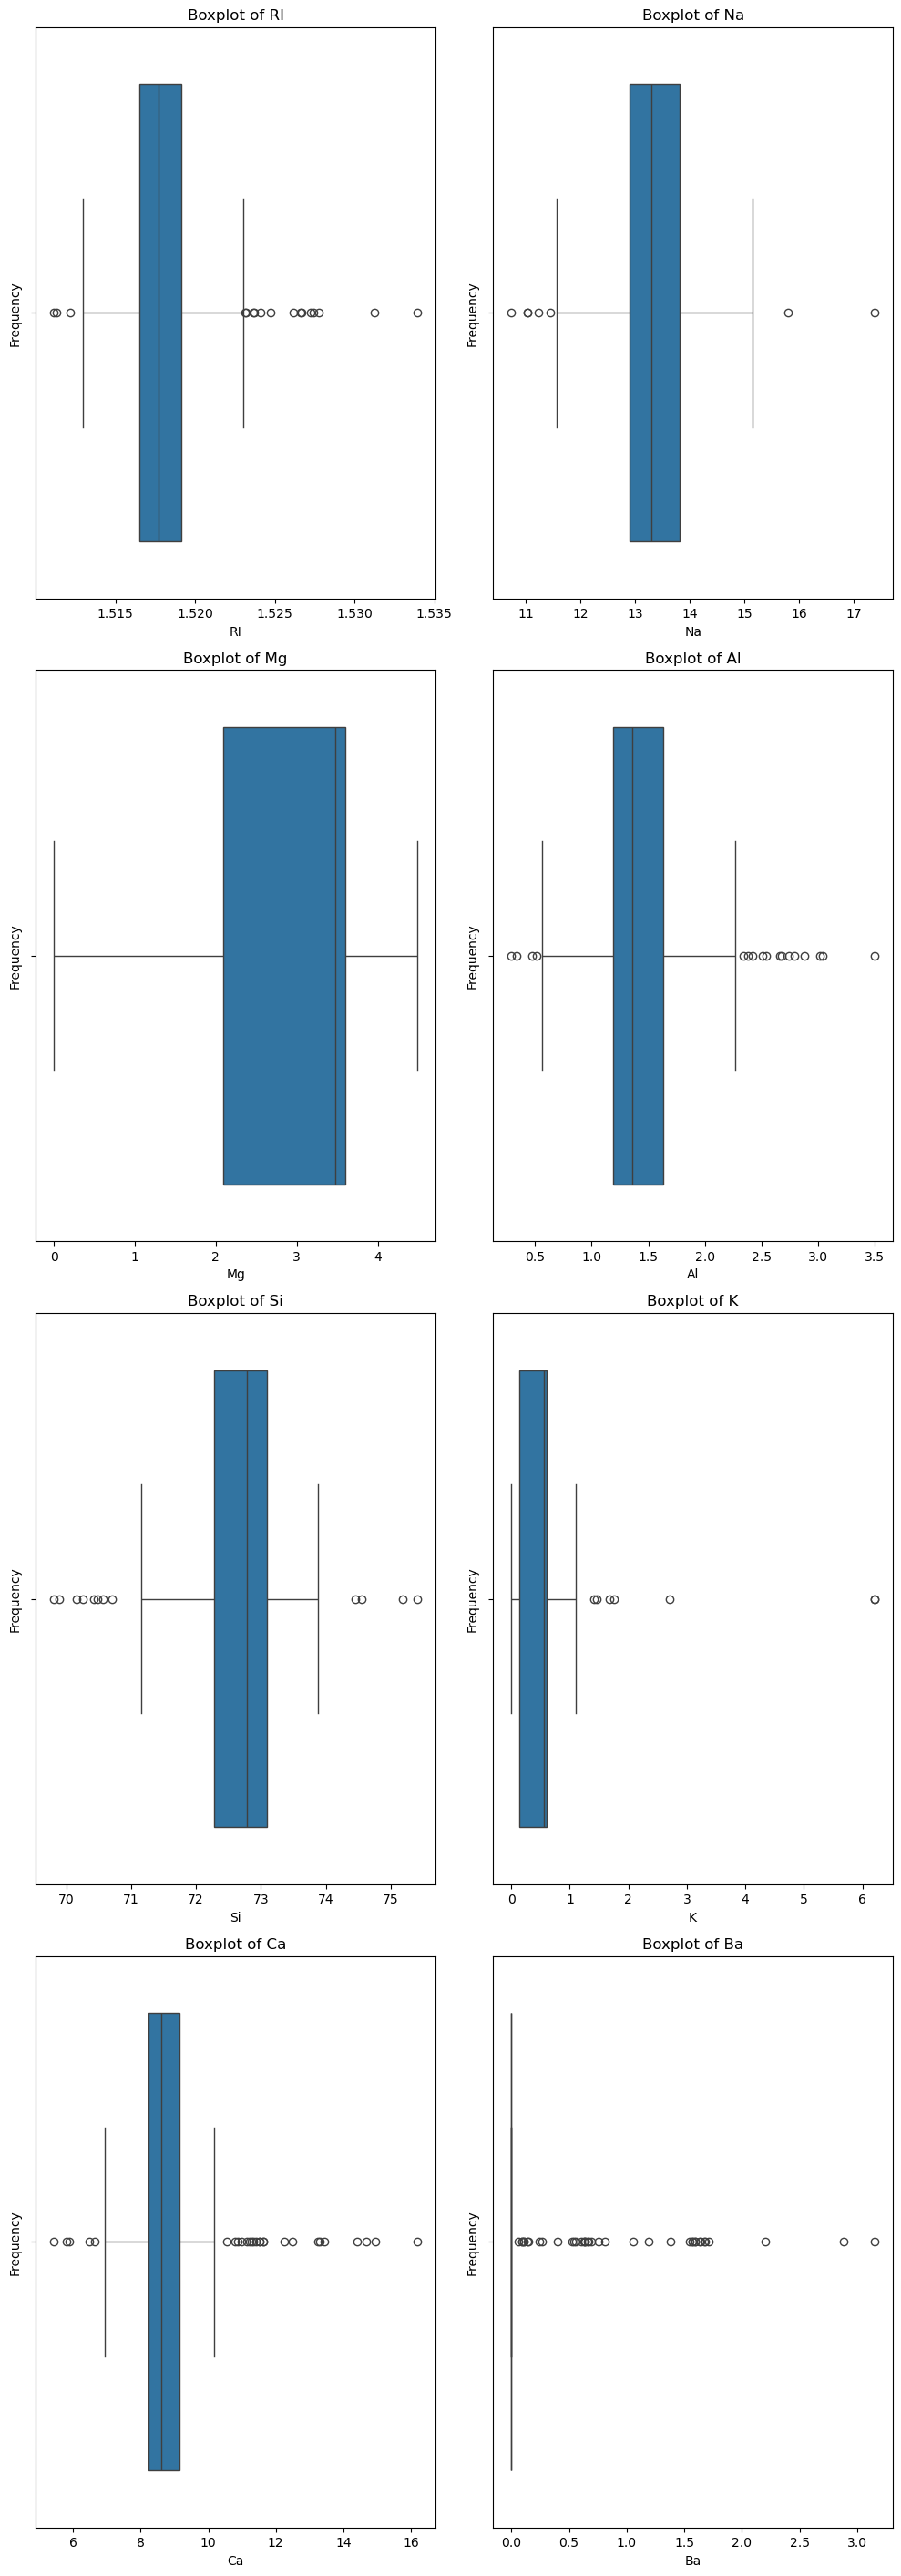

In [12]:
# BOXPLOT
plt.figure(figsize = (10,35))
for i, column in enumerate( glass_num,1):
    plt.subplot(5,2,i)
    sns.boxplot(x = glass_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
#  remove the outliers
def remove_outliers_capping(glass_num, column):
    Q1 = glass_num[column].quantile(0.25)
    Q3 = glass_num[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    glass_num[column] = np.where(glass_num[column] < lower_bound, lower_bound, glass_num[column])
    glass_num[column] = np.where(glass_num[column] > upper_bound, upper_bound, glass_num[column])

    return glass_num

# Apply capping to each numerical column
for col in glass_num.columns:
  glass_num = remove_outliers_capping(glass_num, col)

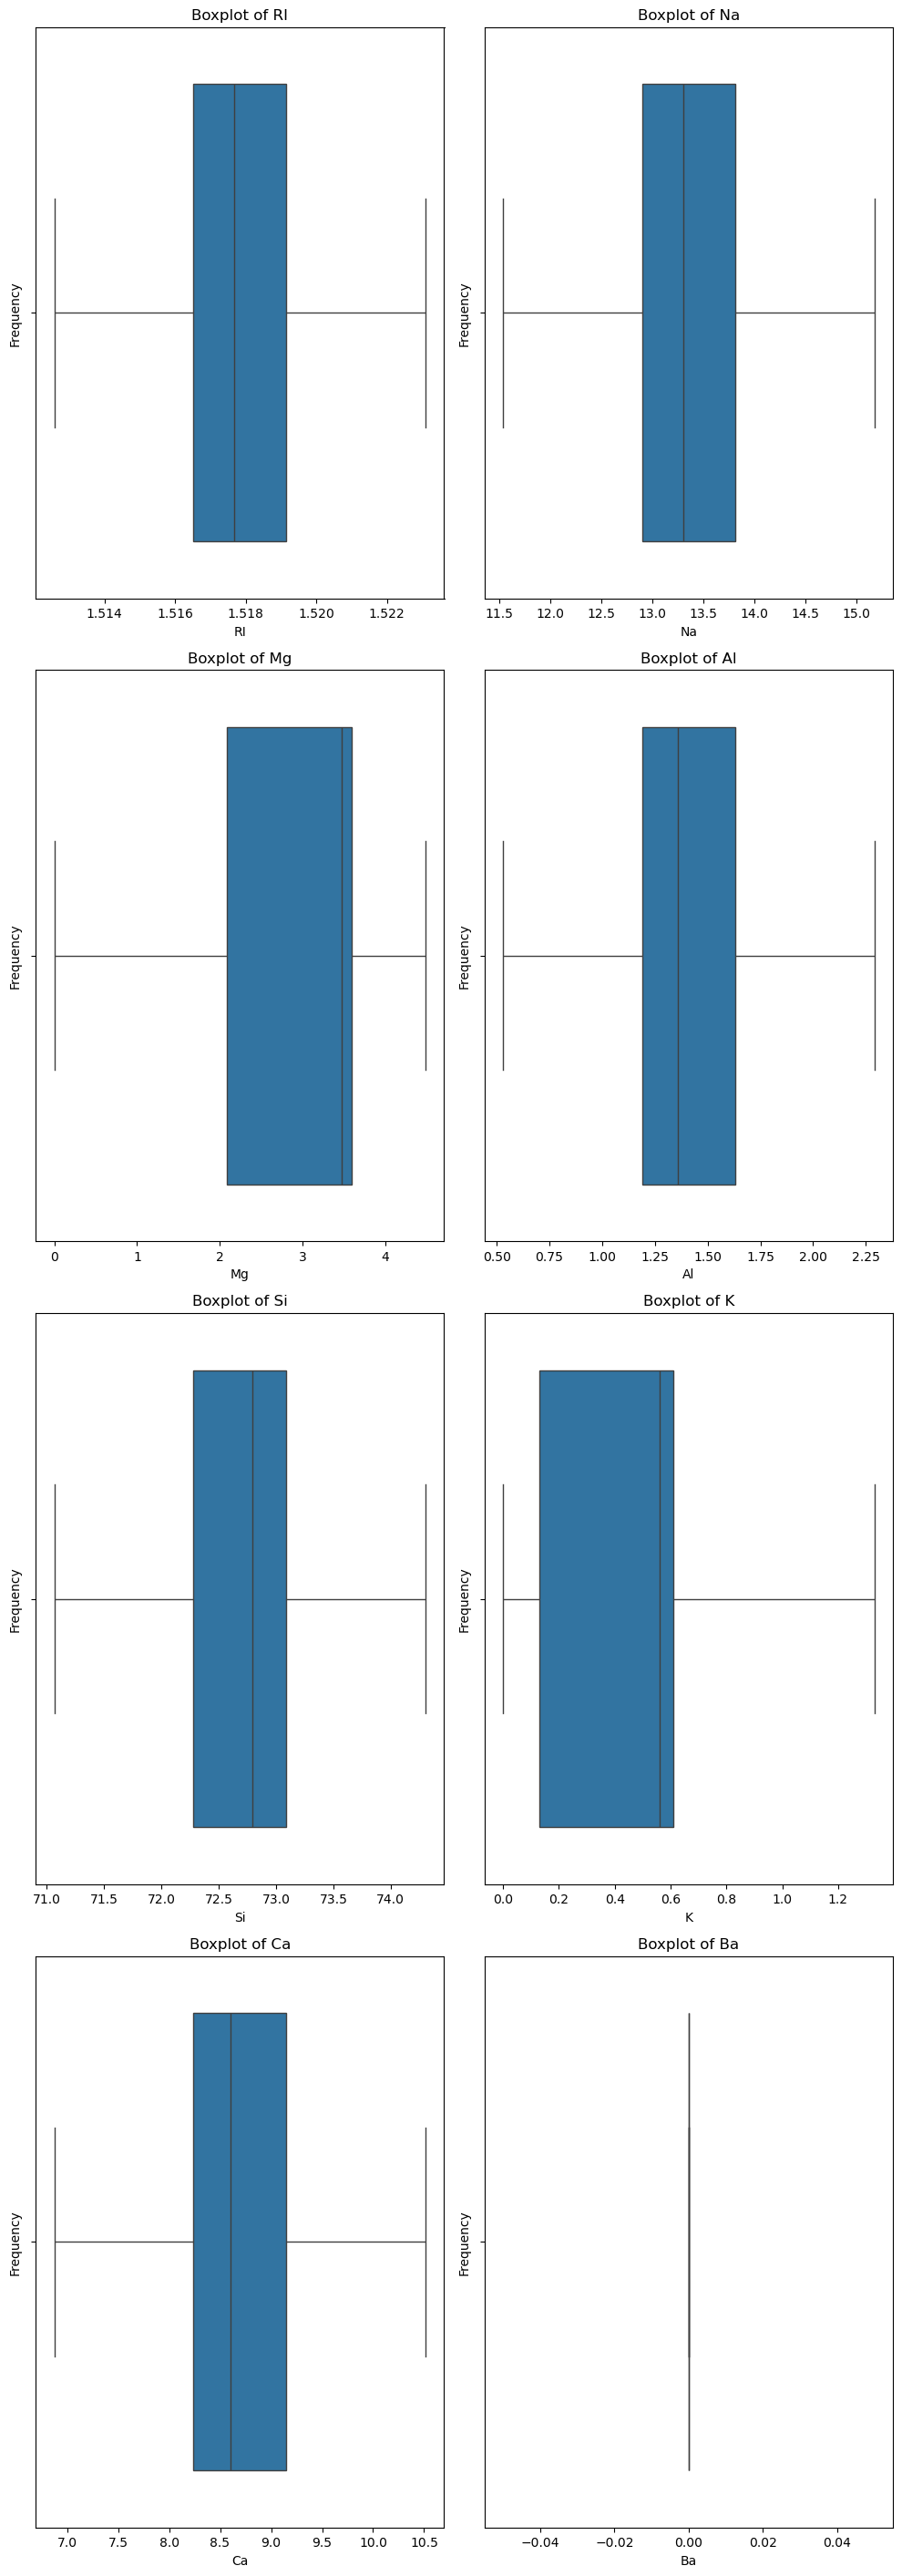

In [14]:
plt.figure(figsize = (10,35))
for i, column in enumerate(glass_num,1):
    plt.subplot(5,2,i)
    sns.boxplot(x = glass_num[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

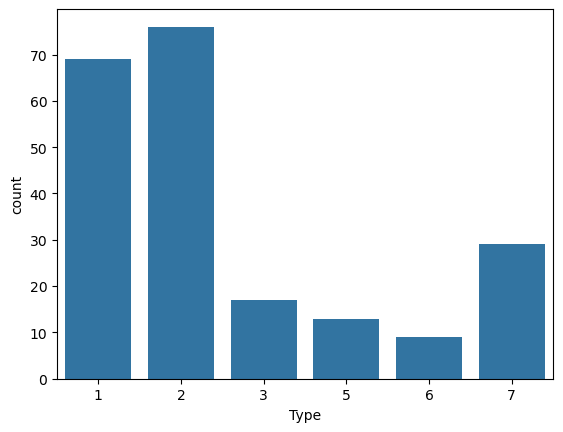

In [15]:
# Countplot for 'Type'
sns.countplot(data = glass_df, x = 'Type')
plt.show()

#### *3: Data Preprocessing*

In [16]:
# Standardizing continuous variables
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
num_scaled = pd.DataFrame(SS.fit_transform(glass_num), columns = (glass_num.columns))
num_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.044419,0.0
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-1.115733,0.0
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-1.173956,0.0
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.661589,0.0
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.836260,0.0
...,...,...,...,...,...,...,...,...
208,-0.813017,0.998432,-1.860172,2.060042,-0.096228,-1.187901,0.456303,0.0
209,-0.549827,2.052606,-1.860172,1.345596,0.589533,-1.450441,-0.451984,0.0
210,1.063273,1.295764,-1.860172,1.417041,1.138143,-1.450441,-0.405405,0.0
211,-0.694157,1.322794,-1.860172,1.226522,1.427687,-1.450441,-0.358827,0.0


In [17]:
glass_cat.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [18]:
# final data
glass_final = pd.concat([num_scaled, glass_cat], axis=1)
glass_final

,RI,Na,Mg,Al,Si,K,Ca,Ba,Type
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.044419,0.0,1.0
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-1.115733,0.0,1.0
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-1.173956,0.0,1.0
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.661589,0.0,1.0
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.836260,0.0,1.0
...,...,...,...,...,...,...,...,...,...
209,-0.549827,2.052606,-1.860172,1.345596,0.589533,-1.450441,-0.451984,0.0,7.0
210,1.063273,1.295764,-1.860172,1.417041,1.138143,-1.450441,-0.405405,0.0,7.0
211,-0.694157,1.322794,-1.860172,1.226522,1.427687,-1.450441,-0.358827,0.0,7.0
212,-0.439457,1.120068,-1.860172,1.559930,1.046708,-1.450441,-0.195801,0.0,7.0


In [19]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 26.4 KB


In [20]:
# Defining target and features
X = glass_final.iloc[:, 0:7]
Y = glass_final.iloc[:, -1]

In [21]:
X

,RI,Na,Mg,Al,Si,K,Ca
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.044419
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-1.115733
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-1.173956
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.661589
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.836260
...,...,...,...,...,...,...,...
209,-0.549827,2.052606,-1.860172,1.345596,0.589533,-1.450441,-0.451984
210,1.063273,1.295764,-1.860172,1.417041,1.138143,-1.450441,-0.405405
211,-0.694157,1.322794,-1.860172,1.226522,1.427687,-1.450441,-0.358827
212,-0.439457,1.120068,-1.860172,1.559930,1.046708,-1.450441,-0.195801


In [22]:
X.isna().sum()

RI    1
Na    1
Mg    1
Al    1
Si    1
K     1
Ca    1
dtype: int64

In [23]:
X.dropna(inplace = True)
X.shape

(213, 7)

In [24]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
209    7.0
210    7.0
211    7.0
212    7.0
213    7.0
Name: Type, Length: 214, dtype: float64

In [25]:
Y.isna().sum()

1

In [26]:
Y.dropna(inplace = True)
Y.shape

(213,)

#### *4: Random Forest Model Implementation*

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                 max_samples = 0.6, max_features = 0.7)

In [28]:
# Model fiting and Cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    rf.fit(X_train,Y_train)
    Y_pred_train = rf.predict(X_train)
    Y_pred_test = rf.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

# cross validation accuracies
print("RF-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("RF-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

RF-CV-training accuracy:  0.99
RF-CV-test accuracy:  0.76
variance 0.23


In [29]:
# Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, Y_pred_test, average='weighted', zero_division=0)
recall = recall_score(Y_test, Y_pred_test, average='weighted')
f1 = f1_score(Y_test, Y_pred_test, average='weighted')

# Print Evaluation results
print("Precision (weighted):", np.round(precision,2))
print("Recall (weighted):", np.round(recall,2))
print("F1-score (weighted):", np.round(f1,2))

Precision (weighted): 0.57
Recall (weighted): 0.58
F1-score (weighted): 0.55


In [30]:
# classification report (RANDOM FOREST CLASSIFIER)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

         1.0       0.60      0.90      0.72        10
         2.0       0.53      0.60      0.56        15
         3.0       0.50      0.25      0.33         4
         5.0       0.50      0.14      0.22         7
         6.0       1.00      1.00      1.00         2
         7.0       0.60      0.60      0.60         5

    accuracy                           0.58        43
   macro avg       0.62      0.58      0.57        43
weighted avg       0.57      0.58      0.55        43



#### *5: Bagging and Boosting Methods*

In [31]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(n_estimators = 100, 
                                  random_state = 42,
                                  max_samples = 0.8, 
                                  max_features = 0.7)
training_acc_bag = []
test_acc_bag = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    bagging_model.fit(X_train,Y_train)
    Y_pred_train_bag = bagging_model.predict(X_train)
    Y_pred_test_bag = bagging_model.predict(X_test)
    training_acc_bag.append(accuracy_score(Y_train,Y_pred_train_bag))
    test_acc_bag.append(accuracy_score(Y_test,Y_pred_test_bag))

# cross validation accuracies
print("Bagging-CV-training accuracy: ",np.round(np.mean(training_acc_bag),2))
print("Bagging-CV-test accuracy: ",np.round(np.mean(test_acc_bag),2))
print("variance", np.round(np.mean(training_acc_bag)-np.mean(test_acc_bag),2))

Bagging-CV-training accuracy:  1.0
Bagging-CV-test accuracy:  0.77
variance 0.23


In [32]:
# Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, Y_pred_test_bag, average='weighted', zero_division=0)
recall = recall_score(Y_test, Y_pred_test_bag, average='weighted')
f1 = f1_score(Y_test, Y_pred_test_bag, average='weighted')

# Print Evaluation results
print("Precision (weighted):", np.round(precision,2))
print("Recall (weighted):", np.round(recall,2))
print("F1-score (weighted):", np.round(f1,2))

Precision (weighted): 0.74
Recall (weighted): 0.67
F1-score (weighted): 0.66


In [33]:
# classification report (BAGGING CLASSIFIER)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test_bag))

              precision    recall  f1-score   support

         1.0       0.59      1.00      0.74        10
         2.0       0.67      0.67      0.67        15
         3.0       1.00      0.25      0.40         4
         5.0       1.00      0.43      0.60         7
         6.0       1.00      1.00      1.00         2
         7.0       0.60      0.60      0.60         5

    accuracy                           0.67        43
   macro avg       0.81      0.66      0.67        43
weighted avg       0.74      0.67      0.66        43



In [34]:
# Boosting 
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 100, 
                                      random_state = 42,
                                      learning_rate = 0.1)
training_acc_gb = []
test_acc_gb = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size = 0.2, random_state = i)

    # fit model
    gb_model.fit(X_train,Y_train)
    Y_pred_train_gb = gb_model.predict(X_train)
    Y_pred_test_gb = gb_model.predict(X_test)
    training_acc_gb.append(accuracy_score(Y_train,Y_pred_train_gb))
    test_acc_gb.append(accuracy_score(Y_test,Y_pred_test_gb))

# cross validation accuracies
print("GB-CV-training accuracy: ",np.round(np.mean(training_acc_gb),2))
print("GB-CV-test accuracy: ",np.round(np.mean(test_acc_gb),2))
print("variance", np.round(np.mean(training_acc_gb)-np.mean(test_acc_gb),2))

GB-CV-training accuracy:  1.0
GB-CV-test accuracy:  0.73
variance 0.27


In [35]:
# Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, Y_pred_test_gb, average='weighted', zero_division=0)
recall = recall_score(Y_test, Y_pred_test_gb, average='weighted')
f1 = f1_score(Y_test, Y_pred_test_gb, average='weighted')

# Print Evaluation results
print("Precision (weighted):", np.round(precision,2))
print("Recall (weighted):", np.round(recall,2))
print("F1-score (weighted):", np.round(f1,2))

Precision (weighted): 0.64
Recall (weighted): 0.6
F1-score (weighted): 0.6


In [36]:
# classification report (GRADIENT BOOSTING CLASSIFIER)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test_gb))

              precision    recall  f1-score   support

         1.0       0.53      0.90      0.67        10
         2.0       0.58      0.47      0.52        15
         3.0       0.50      0.25      0.33         4
         5.0       1.00      0.57      0.73         7
         6.0       1.00      1.00      1.00         2
         7.0       0.50      0.60      0.55         5

    accuracy                           0.60        43
   macro avg       0.69      0.63      0.63        43
weighted avg       0.64      0.60      0.60        43



In [38]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb_model = GradientBoostingClassifier(n_estimators = 200, 
                                      random_state = 42,
                                      learning_rate = 0.1)
training_acc_adb = []
test_acc_adb = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size = 0.2, random_state = i)

    # fit model
    adb_model.fit(X_train,Y_train)
    Y_pred_train_adb = gb_model.predict(X_train)
    Y_pred_test_adb = gb_model.predict(X_test)
    training_acc_adb.append(accuracy_score(Y_train,Y_pred_train_adb))
    test_acc_adb.append(accuracy_score(Y_test,Y_pred_test_adb))

# cross validation accuracies
print("ADB-CV-training accuracy: ",np.round(np.mean(training_acc_adb),2))
print("ADB-CV-test accuracy: ",np.round(np.mean(test_acc_adb),2))
print("variance", np.round(np.mean(training_acc_adb)-np.mean(test_acc_adb),2))

ADB-CV-training accuracy:  0.92
ADB-CV-test accuracy:  0.92
variance -0.0


In [39]:
# Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, Y_pred_test_adb, average='weighted', zero_division=0)
recall = recall_score(Y_test, Y_pred_test_adb, average='weighted')
f1 = f1_score(Y_test, Y_pred_test_adb, average='weighted')

# Print Evaluation results
print("Precision (weighted):", np.round(precision,2))
print("Recall (weighted):", np.round(recall,2))
print("F1-score (weighted):", np.round(f1,2))

Precision (weighted): 0.64
Recall (weighted): 0.6
F1-score (weighted): 0.6


In [40]:
# classification report (ADABOOST CLASSIFIER)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test_adb))

              precision    recall  f1-score   support

         1.0       0.53      0.90      0.67        10
         2.0       0.58      0.47      0.52        15
         3.0       0.50      0.25      0.33         4
         5.0       1.00      0.57      0.73         7
         6.0       1.00      1.00      1.00         2
         7.0       0.50      0.60      0.55         5

    accuracy                           0.60        43
   macro avg       0.69      0.63      0.63        43
weighted avg       0.64      0.60      0.60        43



**1. Explain Bagging and Boosting methods. How is it different from each other.**

Bagging and Boosting are both ensemble learning techniques used to improve the performance and robustness of machine learning models, but they work in fundamentally different ways.

**Bagging (Bootstrap Aggregating)** involves training multiple models in parallel using random subsets of the training data sampled with replacement. Each model makes a prediction, and the final output is decided by majority voting (for classification) or averaging (for regression). A common example is the *Random Forest*, which is a bagging ensemble of decision trees. Bagging is particularly effective at reducing variance and helps prevent overfitting.

**Boosting**, on the other hand, trains models sequentially. Each model is trained to correct the mistakes of the previous one, giving more weight to the data points that were misclassified. This sequential focus helps to reduce bias and improve model performance. Examples include *AdaBoost*, *Gradient Boosting*, and *XGBoost*.

###  Bagging vs Boosting: Key Differences
| Feature         | Bagging                              | Boosting                          |
| --------------- | ------------------------------------ | --------------------------------- |
| Training        | Parallel                             | Sequential                        |
| Goal            | Reduce variance                      | Reduce bias                       |
| Sample method   | Bootstrap samples (with replacement) | Full dataset (focus on errors)    |
| Model combining | Equal-weighted voting/averaging      | Weighted voting                   |
| Overfitting     | Reduces overfitting                  | Can overfit if not tuned properly |


**2. Explain how to handle imbalance in the data.**

Handling imbalanced data is crucial when the target classes are not represented equally, as it can lead to biased predictions toward the majority class.

Here are some common strategies I use:

*1. Resampling Techniques:*

   * Oversampling  the minority class, using methods like SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic samples rather than duplicating.
   * Undersampling the majority class to balance the distribution.
   * Sometimes, I use a combination of both to achieve better balance.

*2. Class Weights:*

   * Many models, like RandomForestClassifier and LogisticRegression, have a class_weight='balanced' option that adjusts weights inversely proportional to class frequencies.

This helps penalize the misclassification of minority classes more heavily.

*3. Algorithm Choice:*

   * I may also use tree-based algorithms or ensemble methods that are inherently more robust to imbalance.

*4. Evaluation Metrics:*

   * I avoid relying solely on accuracy.
   * Instead, I use metrics like Precision, Recall, F1-score, and AUC-ROC which give a better picture of model performance in imbalanced scenarios.

